In [ ]:
%%capture 
!pip install scikit-fuzzy

# Importing the Mulcross Dataset

In [ ]:
import pandas as pd

In [ ]:
mulcrossData = pd.read_csv('mulcross.csv')
mulcrossData = mulcrossData.drop('Target',axis = 1)

In [ ]:
mulcrossData.head()

,V1,V2,V3,V4
0,-0.203950,0.363011,1.013766,0.187131
1,-0.761118,2.436424,0.681846,0.654366
2,-0.209979,1.131098,-0.282180,-0.202210
3,0.836812,0.650342,-0.426900,-0.305281
4,0.454204,1.560128,-0.204841,0.219233


In [ ]:
mulcrossData.describe()

,V1,V2,V3,V4
count,2.621440e+05,2.621440e+05,2.621440e+05,2.621440e+05
mean,1.869197e-13,3.053569e-14,1.335155e-13,8.777654e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.620516e+00,-4.254628e+00,-2.836998e+00,-3.167357e+00
25%,-6.829707e-01,-8.252399e-01,-4.600873e-01,-6.373091e-01
50%,5.883664e-02,-1.007720e-02,-2.210133e-03,-1.816787e-01
75%,7.227089e-01,7.020211e-01,4.609398e-01,3.353681e-01
max,4.425919e+00,4.574595e+00,2.838117e+00,2.673695e+00


#Working On One Variable - V1 : AutoMF

In [ ]:
# Extracting the variable
V1 = mulcrossData['V1']

# Sorting the values to be able to generate decent membership functions
V1 = V1.sort_values()

In [ ]:
import skfuzzy as fuzz
import numpy as np
from skfuzzy import control as ctrl

In [ ]:
Fuzzyfied_v1_auto_membership = ctrl.Antecedent(V1, "v1")

In [ ]:
# Fuzzifying the crisp V1 data
Fuzzyfied_v1_auto_membership.automf(3)

# Because we choose 3 in automf
fuzzy_V1_poor = Fuzzyfied_v1_auto_membership['poor']
fuzzy_V1_average = Fuzzyfied_v1_auto_membership['average']
fuzzy_V1_good = Fuzzyfied_v1_auto_membership['good']


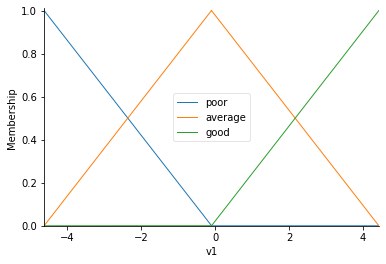

In [ ]:
# Viewing the values
Fuzzyfied_v1_auto_membership.view()

In [ ]:
# interpolating some values to the membership function
print("membership of V1 = 0 to Average", fuzz.interp_membership(V1, fuzzy_V1_average.mf, 0))
print("membership of V1 = 5 to Average",fuzz.interp_membership(V1, fuzzy_V1_average.mf, 5))
print("membership of V1 = 70 to Good",fuzz.interp_membership(V1, fuzzy_V1_good.mf, 70))

membership of V1 = 0 to Average 0.9784891993983578
membership of V1 = 5 to Average 0.0
membership of V1 = 70 to Good 0.0


In [ ]:
# Trying some Sci-kit Fuzzy functionalities
# Fuzzy And
universe_membership = fuzz.fuzzy_and(V1,fuzzy_V1_average.mf,V1,fuzzy_V1_good.mf)

fuzzy_and_universe = universe_membership[0]
fuzzy_and_membership = universe_membership[1]

good_and_avergae_intersect = ctrl.Antecedent(fuzzy_and_universe, "intersection")

good_and_avergae_intersect['and'] = fuzzy_and_membership

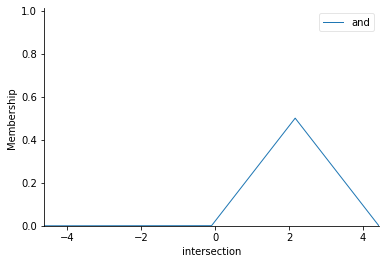

In [ ]:
good_and_avergae_intersect.view()

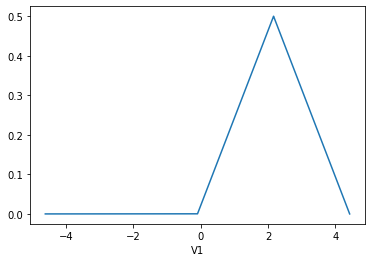

In [ ]:
import seaborn as sns

# Show the intersection membership function
sns.lineplot(x = fuzzy_and_universe, y = fuzzy_and_membership )

# Working on another Variable V2 - Manual Membership Functions

In [ ]:
# Extracting the variable
V2 = mulcrossData['V2']

V2.describe()

count    2.621440e+05
mean     3.053569e-14
std      1.000000e+00
min     -4.254628e+00
25%     -8.252399e-01
50%     -1.007720e-02
75%      7.020211e-01
max      4.574595e+00
Name: V2, dtype: float64

In [ ]:
# creating the object containing both the universe and the membership function
fuzzy_variable_v2 = ctrl.Antecedent(V2, 'V2')

In [ ]:
fuzzy_variable_v2['bad'] = fuzz.trimf(fuzzy_variable_v2.universe, [-4,-2,0])
fuzzy_variable_v2['average'] = fuzz.gaussmf(fuzzy_variable_v2.universe,0,1)
fuzzy_variable_v2['good'] = fuzz.sigmf (fuzzy_variable_v2.universe,2,2)

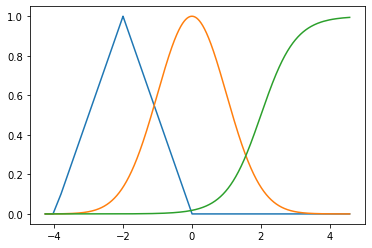

In [ ]:
sns.lineplot(x = fuzzy_variable_v2.universe, y = fuzzy_variable_v2['bad'].mf )
sns.lineplot(x = fuzzy_variable_v2.universe, y = fuzzy_variable_v2['average'].mf )
sns.lineplot(x = fuzzy_variable_v2.universe, y = fuzzy_variable_v2['good'].mf )

In [ ]:
# trying interpolating values on non sorted sets

# interpolating some values to the membership function
print("membership of V2 = 70 to bad", fuzz.interp_membership(V2, fuzzy_variable_v2['bad'].mf, 70))
print("membership of V2 = 5 to Average",fuzz.interp_membership(V2, fuzzy_variable_v2['average'].mf, 5))
print("membership of V2 = 4 to Good",fuzz.interp_membership(V2, fuzzy_variable_v2['good'].mf, 4))

membership of V2 = 70 to bad 0.0
membership of V2 = 5 to Average 0.0
membership of V2 = 4 to Good 0.0


In [ ]:
# Sorting and verifying if the issue is solved 
V2 = V2.sort_values()

fuzzy_variable_v2 = ctrl.Antecedent(V2, 'V2')
fuzzy_variable_v2['bad'] = fuzz.trimf(fuzzy_variable_v2.universe, [-4,-2,0])
fuzzy_variable_v2['average'] = fuzz.gaussmf(fuzzy_variable_v2.universe,0,1)
fuzzy_variable_v2['good'] = fuzz.sigmf (fuzzy_variable_v2.universe,2,2)

# interpolating some values to the membership function
print("membership of V2 = 70 to bad", fuzz.interp_membership(V2, fuzzy_variable_v2['bad'].mf, 70))
print("membership of V2 = 5 to Average",fuzz.interp_membership(V2, fuzzy_variable_v2['average'].mf, 5))
print("membership of V2 = 4 to Good",fuzz.interp_membership(V2, fuzzy_variable_v2['good'].mf, 4))

membership of V2 = 70 to bad 0.0
membership of V2 = 5 to Average 0.0
membership of V2 = 4 to Good 0.9820117139746172


=> We should always sort the subset that will be fuzzified for the tree (not a big computational problem, as the subset is of size ~512)

When interpolating new membership values, beware of nan's when the values are > max and < min of the universe of the fuzzy variable

# Crisp to Fuzzy Conversion Module using skfuzzy

We are here trying to create a class that will, given a Pandas DataFrame of Categories, will return a DataFrame where each Attribute is splitted to different Modalities, exemple:


In [ ]:
exemple_df = pd.DataFrame({'age':[15,30,50]}, index = [0,1,2])
exemple_df

NameError: ignored

In [ ]:
exemple_fuzzy_df = pd.DataFrame({'age;jeune':[0.5,0.9,0.2], 'age;moyen':[0.1,0.6,0.4]},index= [0,1,2])
exemple_fuzzy_df.head()

,age;jeune,age;moyen
0,0.5,0.1
1,0.9,0.6
2,0.2,0.4


Modélisation: Une Classe Fuzzifier contiendra pour chaque feature de la Dataset une liste de FuzzyVariables (classe définie dans sci-kit fuzzy) ou chaque Fuzzy Variable contiendra l'univers de la variable crisp correspondante, ses modalités et les fonctions d'appartenances correspondantes

<br>

Notes à prendre en considération : Pour pouvoir bien calculer la fonction d'appartenance d'une modalité (dans le cas d'automf) mais surtout l'interpolation d'une nouvelle entrée (ligne) il est primordial que l'univers de la fuzzy variable soit sorted (comme vu en haut) 


<br>

Pour remédier à ce problème deux approches sont envisageables:

*   Trier chaque variable séparemment en sauvegardant les index
*   Recréer la fonction d'interpolation d'une manière que ne subit pas cette contrainte (un algorithme en O(n) est envisageable) 



In [ ]:
from collections import OrderedDict
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_string_dtype
from sklearn.preprocessing import OneHotEncoder

In [ ]:
def interpolate(x, mf, xx):
  df = pd.DataFrame({'x': x, 'mf':mf})
  df = df.sort_values(by='x')
  return fuzz.interp_membership(df.x,df.mf,xx)

In [ ]:
class Fuzzifier():
  """
  Fuzzifier class: given a DataFrame of Crisp Data Return corresponding fuzzified data
  ----------
  Parameters
  ----------
  x : dataframe-like
      Universe variables. Contains the features data (must be numerical)
      Required.
  modalities : Dictionnary where every key corresponds to a feature
      and values are either an object containing the modalities as keys, and the membership function (or 'auto') as value,
      or auto as key and the number of modalities as value . Optional.
      exemple: {'age': {'old': {'trimf': [0,1,2]}, 'young': {'gaussmf': [0,1]}}}
      exemple2: {'age': {'auto' : 3}}
  Methods
  -------
  """
  def __init__(self, x, modalities = {}):
    self.x = x
    self.modalities = modalities
    self.variables = OrderedDict()
    self.df = pd.DataFrame()


  def __getitem__(self, key):
        """
        Calling `fuzzifier['label']` will return the 'label' fuzzy variable
        """
        if key in self.variables.keys():
            return self.variables[key]
        else:
            # Build a pretty list of available fuzzy variables and raise an
            # informative error message
            options = '['
            for available_key in self.variables.keys():
              options += "'" + str(available_key) + "',"
            options += ']'
            raise ValueError("Fuzzy Variable {0}' does not exist.\n "
                             "Available options: {1}".format(key, options))
            

  
  def fuzzify(self):
    """
    The fuzzifying procedure, takes no params.
    """
    # TODO: verify params passed and raise errors if any problem

    for variable_name in self.x.columns:
      # Create the FuzzyVariable object
      fuzzyVar = ctrl.Antecedent(self.x[variable_name], variable_name)
      
      # check if key is present in modalities, if it is create modalities else auto
      if variable_name in self.modalities.keys():
        self.__fuzzify_numerical_in_modalities(variable_name,fuzzyVar)
       

      else:
        # If variable name neither categorical nor present in the passed object
        fuzzyVar.automf(3)

      self.variables[variable_name] = fuzzyVar

    # If the fuzzy method is recalled, recreate the DataFrame on toDataFrame method call
    self.df = pd.DataFrame()


  def __fuzzify_numerical_in_modalities(self, variable_name,fuzzyVar):

     # Get modalities corresponding to that feature name
      modalities = self.modalities[variable_name]

      # check if the modalities object is {'auto': 3/5/7} create the memberships automatically 
      if (next(iter(modalities)) == 'auto'):
        # Get number of triangular membership function (3, 5 or 7)
        n = modalities['auto']

        # Auto Generate membership functions
        fuzzyVar.automf(n);

      else :
        # For each modality (like 'old' or 'young') add the membership function to the fuzzy var
        for modality in modalities.items():

          # Assign membership values to fuzzy var
          # modality[0] is the modality name, modality[1] is the membership + values dict
          fuzzyVar[modality[0]] = self.__getMembership(fuzzyVar.universe, modality[1])

  # Utility method returning the sci-kit fuzzy membership function given the name of the membership function
  def __getMembership(self,x, membershipFunctionData):

    # Get the membership function type; can be trimf, gaussmf or trapmf or auto
    membership_name = next(iter(membershipFunctionData))

    if (membership_name == 'trimf' ):
      return fuzz.trimf(x, membershipFunctionData[membership_name])

    if (membership_name == 'trapmf' ):
      return fuzz.trapmf(x, membershipFunctionData[membership_name])

    if (membership_name == 'gaussmf'):
      return fuzz.gaussmf(x, membershipFunctionData[membership_name][0],membershipFunctionData[membership_name][1] )
    return None

  # After fuzzification, use this method to return a DataFrame containing the fuzzified Data
  def toDataFrame(self):

    # Only Generate the dictionnary once
    if (not self.df.empty):
      return self.df

    self.df = pd.DataFrame({}, index = self.x.index)

    for fuzzyVar_name, fuzzy_var in self.variables.items():
      # create columns and append to DataFrame
      for modality in fuzzy_var.terms:
        self.df['{0};{1}'.format(fuzzyVar_name, modality)] = fuzzy_var[modality].mf
    return self.df

  def interpolate_new_entry(self, xx):
    new_df = pd.DataFrame({}, index = [0])
    for fuzzyVar_name, fuzzy_var in self.variables.items():
      # create columns and append to DataFrame
      for modality in fuzzy_var.terms:
        new_df['{0};{1}'.format(fuzzyVar_name, modality)] = interpolate(self.x.loc[:,fuzzyVar_name],fuzzy_var[modality].mf, xx.loc[:,fuzzyVar_name])
    return new_df
  

  def view(self):
    """
    Show the membership functions to each variable
    """
    for fuzzyVar_name, fuzzy_var in self.variables.items():
      fig, ax = plt.subplots()
      labels = []

      for modality in fuzzy_var.terms:
        labels.append(modality)
        sns.lineplot(ax = ax, x = fuzzy_var.universe, y = fuzzy_var[modality].mf)
      
      ax.legend(labels = labels)
      plt.title(fuzzyVar_name)
      plt.show()



# API and Exemple



class Fuzzifier(x, modalities = True)
<br>
**Parameters:**


*   **x:** dataframe object containing crisp data
*   **modalities:** dictionnary of feature - modalities corresponding to that feature. For every Modality (term) you pass the values corresponding to the function in an array. <br> Possible membership functions: trimf (takes min-mid-max) / gaussmf (takes mean-std) / trapmf (takes min-a-b-max)<br>
The modality dictionnary can take auto as key and number of triangles as value as seen in the exemple below


**Methods:**

*   fuzzify(): Does the fuzzification
*   toDataFrame() returns the fuzzified values as dataFrame
*   view(): shows every variable and its membership functions (can be slow for larger values +2000)




In [ ]:
# Exemple on a splice of the mulcross dataset
v1_modalities = {'poor' : {'trimf':[-4,-2,0]}, 'average': {'gaussmf':[0,1]}, 'eggcelent': {'trapmf':[0,1,2,3]}}
v2_modalities = {'average': {'gaussmf': [0,3]}}
v3_modalities = {'auto': 7}

fuzzy_variables = {'V1': v1_modalities, 'V2': v2_modalities, 'V3': v3_modalities}

fuzzifierMulcross = Fuzzifier(mulcrossData.iloc[0:1000], fuzzy_variables)
fuzzifierMulcross.fuzzify() 

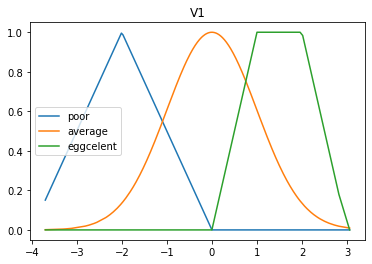

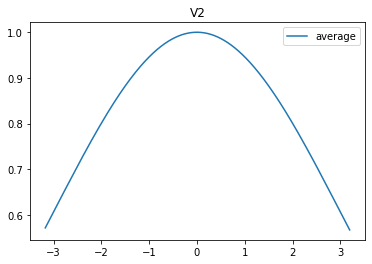

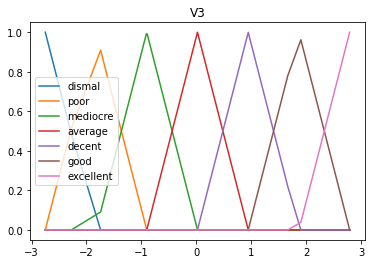

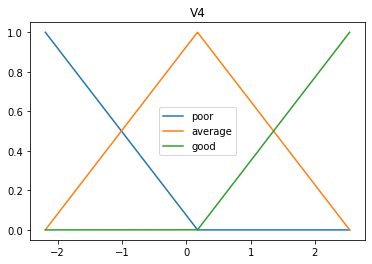

In [ ]:
fuzzifierMulcross.view()

In [ ]:
fuzzifierMulcross.toDataFrame()

,V1;poor,V1;average,V1;eggcelent,V2;average,V3;dismal,V3;poor,V3;mediocre,V3;average,V3;decent,V3;good,V3;excellent,V4;poor,V4;average,V4;good
0,0.101975,0.979417,0.000000,0.992706,0.000000,0.000000,0.000000,0.000000,0.921979,0.078021,0.000000,0.000000,0.994471,0.005529
1,0.380559,0.748525,0.000000,0.719077,0.000000,0.000000,0.000000,0.281659,0.718341,0.000000,0.000000,0.000000,0.796999,0.203001
2,0.104989,0.978196,0.000000,0.931390,0.000000,0.000000,0.326309,0.673691,0.000000,0.000000,0.000000,0.159022,0.840978,0.000000
3,0.000000,0.704598,0.836812,0.976777,0.000000,0.000000,0.483132,0.516868,0.000000,0.000000,0.000000,0.202584,0.797416,0.000000
4,0.000000,0.901991,0.454204,0.873522,0.000000,0.000000,0.242501,0.757499,0.000000,0.000000,0.000000,0.000000,0.980904,0.019096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.336895,1.000000,0.999829,0.000000,0.000000,0.000000,0.837273,0.162727,0.000000,0.000000,0.322403,0.677597,0.000000
996,0.000000,0.806834,0.655190,0.928642,0.000000,0.000000,0.000000,0.000000,0.000000,0.161792,0.838208,0.000000,0.047730,0.952270
997,0.000000,0.751431,0.756010,0.920308,0.867938,0.132062,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.049514,0.950486
998,0.000000,0.967714,0.256197,0.997645,0.000000,0.000000,0.000000,0.000000,0.880244,0.119756,0.000000,0.375002,0.624998,0.000000


In [ ]:
mulcrossData.iloc[1001:1002]

,V1,V2,V3,V4
1001,0.952571,-0.06285,1.35014,0.197492


In [ ]:
fuzzifierMulcross.interpolate_new_entry(mulcrossData.iloc[1001:1002])

,V1;poor,V1;average,V1;eggcelent,V2;average,V3;dismal,V3;poor,V3;mediocre,V3;average,V3;decent,V3;good,V3;excellent,V4;poor,V4;average,V4;good
0,0.0,0.635275,0.952571,0.99978,0.0,0.0,0.0,0.0,0.557474,0.442526,0.0,0.0,0.990092,0.009908


# Testing on Different Datasets

In [ ]:
# The Breast Cancer Dataset - All Auto

# Dropping categorical data
breast_df = pd.read_csv("breast cancer.csv").drop(['id','diagnosis'], axis = 1)

In [ ]:
%%timeit
mammo_fuzzifier = Fuzzifier(breast_df)
mammo_fuzzifier.fuzzify()

100 loops, best of 5: 10.1 ms per loop


In [ ]:
mammo_fuzzifier.toDataFrame()

,radius_mean;poor,radius_mean;average,radius_mean;good,texture_mean;poor,texture_mean;average,texture_mean;good,perimeter_mean;poor,perimeter_mean;average,perimeter_mean;good,area_mean;poor,area_mean;average,area_mean;good,smoothness_mean;poor,smoothness_mean;average,smoothness_mean;good,compactness_mean;poor,compactness_mean;average,compactness_mean;good,concavity_mean;poor,concavity_mean;average,concavity_mean;good,concave points_mean;poor,concave points_mean;average,concave points_mean;good,symmetry_mean;poor,symmetry_mean;average,symmetry_mean;good,fractal_dimension_mean;poor,fractal_dimension_mean;average,fractal_dimension_mean;good,radius_se;poor,radius_se;average,radius_se;good,texture_se;poor,texture_se;average,texture_se;good,perimeter_se;poor,perimeter_se;average,perimeter_se;good,area_se;poor,...,concavity_se;good,concave points_se;poor,concave points_se;average,concave points_se;good,symmetry_se;poor,symmetry_se;average,symmetry_se;good,fractal_dimension_se;poor,fractal_dimension_se;average,fractal_dimension_se;good,radius_worst;poor,radius_worst;average,radius_worst;good,texture_worst;poor,texture_worst;average,texture_worst;good,perimeter_worst;poor,perimeter_worst;average,perimeter_worst;good,area_worst;poor,area_worst;average,area_worst;good,smoothness_worst;poor,smoothness_worst;average,smoothness_worst;good,compactness_worst;poor,compactness_worst;average,compactness_worst;good,concavity_worst;poor,concavity_worst;average,concavity_worst;good,concave points_worst;poor,concave points_worst;average,concave points_worst;good,symmetry_worst;poor,symmetry_worst;average,symmetry_worst;good,fractal_dimension_worst;poor,fractal_dimension_worst;average,fractal_dimension_worst;good
0,0.000000,0.957925,0.042075,0.954684,0.045316,0.000000,0.000000,0.908023,0.091977,0.272534,0.727466,0.000000,0.000000,0.812494,0.187506,0.000000,0.415925,0.584075,0.000000,0.593721,0.406279,0.000000,0.537773,0.462227,0.000000,0.627273,0.372727,0.000000,0.788964,0.211036,0.287706,0.712294,0.0,0.759061,0.240939,0.0,0.261933,0.738067,0.0,0.452377,...,0.0,0.398750,0.601250,0.0,0.376710,0.623290,0.000000,0.633915,0.366085,0.0,0.000000,0.758449,0.241551,0.716951,0.283049,0.000000,0.000000,0.663380,0.336620,0.098604,0.901396,0.0,0.000000,0.797728,0.202272,0.000000,0.761417,0.238583,0.000000,0.862780,0.137220,0.00000,0.175945,0.824055,0.000000,0.803075,0.196925,0.162272,0.837728,0.000000
1,0.000000,0.713711,0.286289,0.454853,0.545147,0.000000,0.000000,0.768433,0.231567,0.000000,0.996819,0.003181,0.420240,0.579760,0.000000,0.636464,0.363536,0.000000,0.592784,0.407216,0.000000,0.302485,0.697515,0.000000,0.240404,0.759596,0.000000,0.717355,0.282645,0.000000,0.687127,0.312873,0.0,0.834821,0.165179,0.0,0.751119,0.248881,0.0,0.748680,...,0.0,0.492328,0.507672,0.0,0.830922,0.169078,0.000000,0.817780,0.182220,0.0,0.000000,0.786197,0.213803,0.392857,0.607143,0.000000,0.000000,0.920365,0.079635,0.129571,0.870429,0.0,0.304893,0.695107,0.000000,0.690873,0.309127,0.000000,0.614058,0.385942,0.000000,0.00000,0.721649,0.278351,0.532821,0.467179,0.000000,0.554244,0.445756,0.000000
2,0.000000,0.797009,0.202991,0.219479,0.780521,0.000000,0.000000,0.808514,0.191486,0.101166,0.898834,0.000000,0.000000,0.971382,0.028618,0.137967,0.862033,0.000000,0.074977,0.925023,0.000000,0.000000,0.728628,0.271372,0.000000,0.980808,0.019192,0.577506,0.422494,0.000000,0.540757,0.459243,0.0,0.811395,0.188605,0.0,0.639259,0.360741,0.0,0.674156,...,0.0,0.220307,0.779693,0.0,0.588619,0.411381,0.000000,0.745989,0.254011,0.0,0.000000,0.887229,0.112771,0.279851,0.720149,0.000000,0.000000,0.983117,0.016883,0.250983,0.749017,0.0,0.032820,0.967180,0.000000,0.229250,0.770750,0.000000,0.280511,0.719489,0.000000,0.00000,0.329897,0.670103,0.192588,0.807412,0.000000,0.573134,0.426866,0.000000
3,0.579819,0.420181,0.000000,0.278323,0.721677,0.000000,0.532997,0.467003,0.000000,0.794189,0.205811,0.000000,0.000000,0.377358,0.622642,0.000000,0.377277,0.622723,0.000000,0.868791,0.131209,0.000000,0.954274,0.

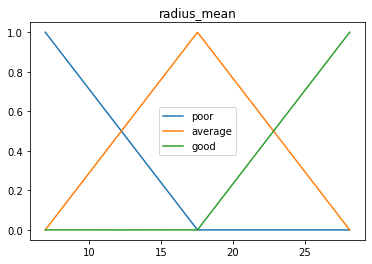

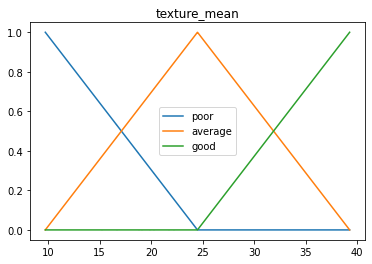

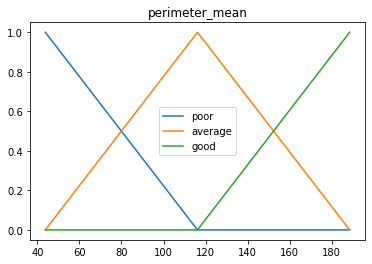

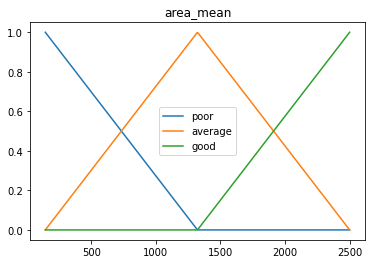

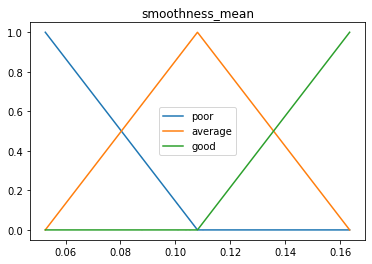

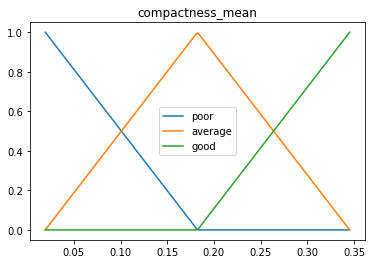

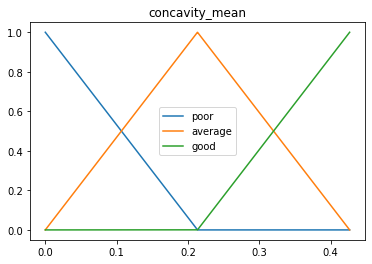

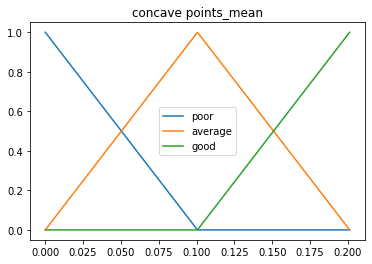

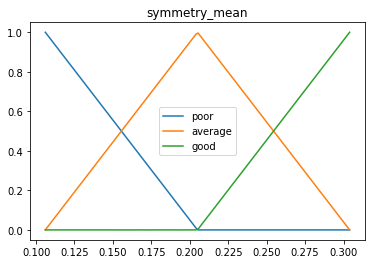

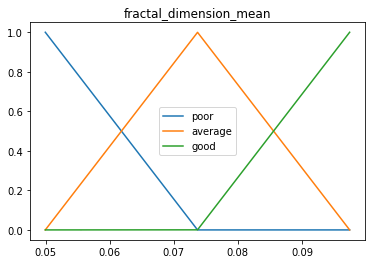

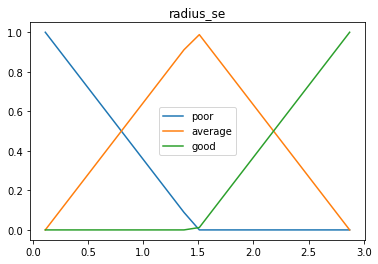

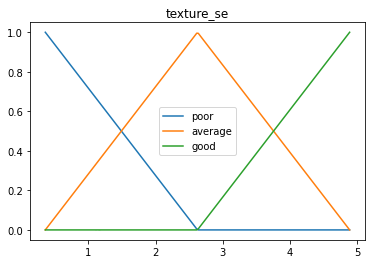

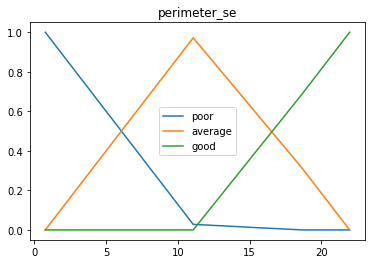

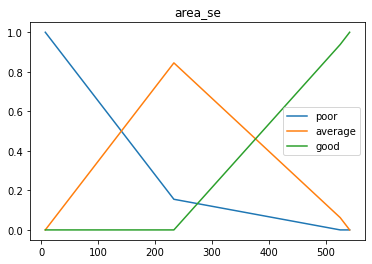

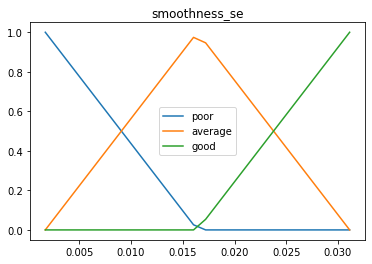

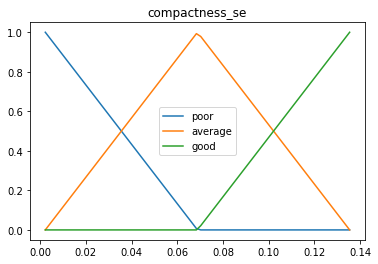

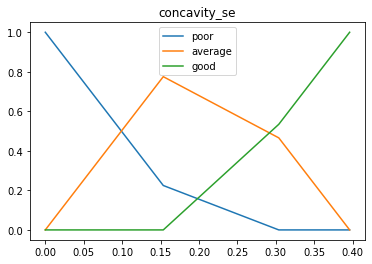

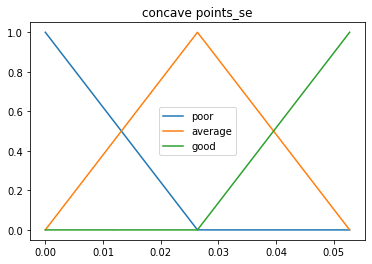

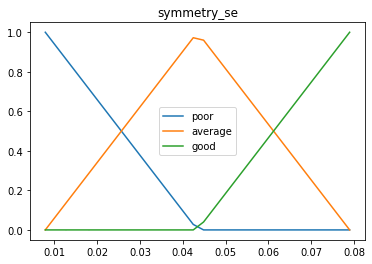

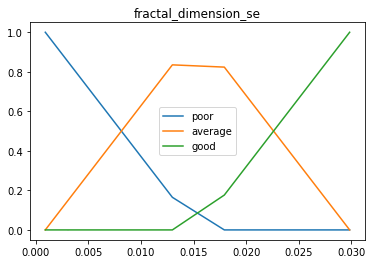

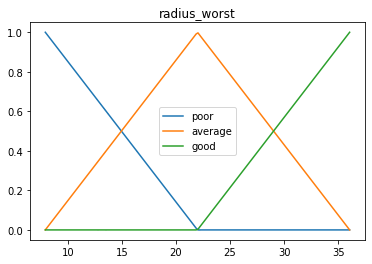

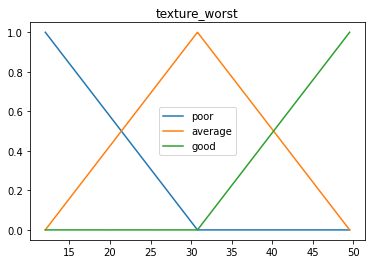

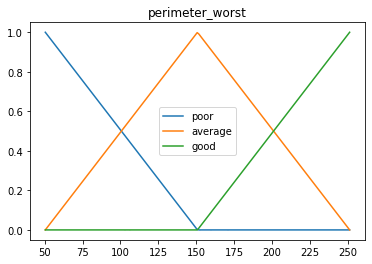

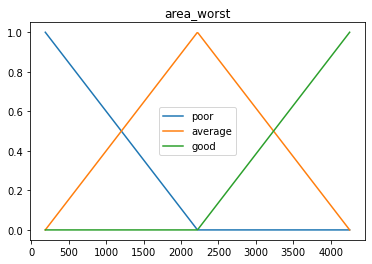

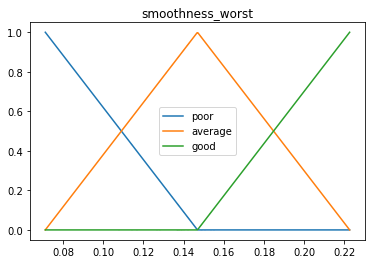

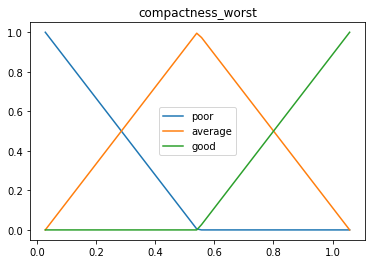

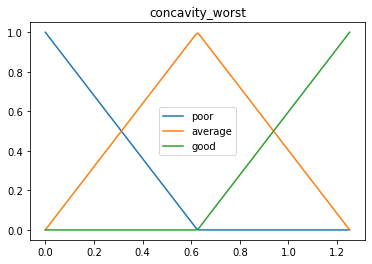

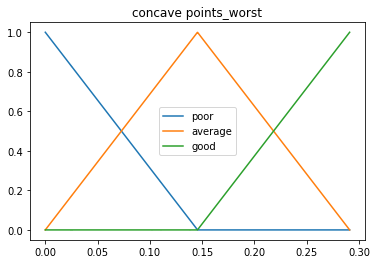

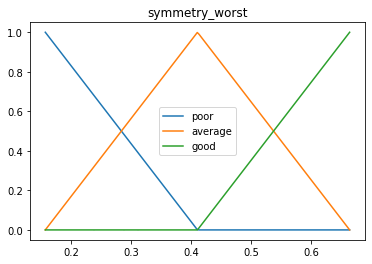

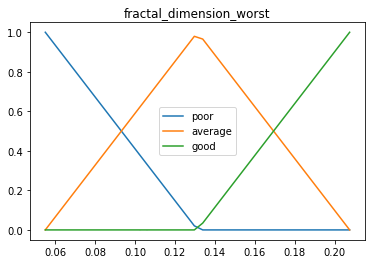

In [ ]:
mammo_fuzzifier.view()

In [ ]:
# Diabetes Dataset

diabetes_df = pd.read_csv('diabetes.csv')

diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
pregnancies_modality = {'auto': 5}
glucose = { 'low': {'trapmf': [0,20,70,90]}, 'high': {'trimf': [90,150,200]} }

modalities = {'Pregnancies': pregnancies_modality, 'Glucose': glucose }

In [ ]:
%%timeit
fuzzifier_diabetes = Fuzzifier(diabetes_df, modalities)
fuzzifier_diabetes.fuzzify()

100 loops, best of 5: 3.92 ms per loop


In [ ]:
fuzzifier_diabetes.toDataFrame()

,Pregnancies;poor,Pregnancies;mediocre,Pregnancies;average,Pregnancies;decent,Pregnancies;good,Glucose;low,Glucose;high,BloodPressure;poor,BloodPressure;average,BloodPressure;good,SkinThickness;poor,SkinThickness;average,SkinThickness;good,Insulin;poor,Insulin;average,Insulin;good,BMI;poor,BMI;average,BMI;good,DiabetesPedigreeFunction;poor,DiabetesPedigreeFunction;average,DiabetesPedigreeFunction;good,Age;poor,Age;average,Age;good,Outcome;poor,Outcome;average,Outcome;good
0,0.000000,0.588235,0.411765,0.000000,0.0,0.00,0.966667,0.000000,0.819672,0.180328,0.292929,0.707071,0.0,1.000000,0.000000,0.0,0.000000,0.998510,0.00149,0.531170,0.468830,0.000000,0.033333,0.966667,0.0,0.0,0.0,1.0
1,0.764706,0.235294,0.000000,0.000000,0.0,0.25,0.000000,0.000000,0.918033,0.081967,0.414141,0.585859,0.0,1.000000,0.000000,0.0,0.207154,0.792846,0.00000,0.766866,0.233134,0.000000,0.666667,0.333333,0.0,1.0,0.0,0.0
2,0.000000,0.117647,0.882353,0.000000,0.0,0.00,0.340000,0.000000,0.950820,0.049180,1.000000,0.000000,0.0,1.000000,0.000000,0.0,0.305514,0.694486,0.00000,0.492741,0.507259,0.000000,0.633333,0.366667,0.0,0.0,0.0,1.0
3,0.764706,0.235294,0.000000,0.000000,0.0,0.05,0.000000,0.000000,0.918033,0.081967,0.535354,0.464646,0.0,0.777778,0.222222,0.0,0.162444,0.837556,0.00000,0.923997,0.076003,0.000000,1.000000,0.000000,0.0,1.0,0.0,0.0
4,1.000000,0.000000,0.000000,0.000000,0.0,0.00,0.783333,0.344262,0.655738,0.000000,0.292929,0.707071,0.0,0.602837,0.397163,0.0,0.000000,0.715350,0.28465,0.000000,0.112724,0.887276,0.600000,0.400000,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.000000,0.000000,0.647059,0.352941,0.0,0.00,0.183333,0.000000,0.754098,0.245902,0.030303,0.969697,0.0,0.574468,0.425532,0.0,0.019374,0.980626,0.00000,0.920581,0.079419,0.000000,0.000000,0.600000,0.4,1.0,0.0,0.0
764,0.529412,0.470588,0.000000,0.000000,0.0,0.00,0.533333,0.000000,0.852459,0.147541,0.454545,0.545455,0.0,1.000000,0.000000,0.0,0.000000,0.903130,0.09687,0.776260,0.223740,0.000000,0.800000,0.200000,0.0,1.0,0.0,0.0
765,0.000000,0.823529,0.176471,0.000000,0.0,0.00,0.516667,0.000000,0.819672,0.180328,0.535354,0.464646,0.0,0.735225,0.264775,0.0,0.219076,0.780924,0.00000,0.857387,0.142613,0.000000,0.700000,0.300000,0.0,1.0,0.0,0.0
766,0.764706,0.235294,0.000000,0.000000,0.0,0.00,0.600000,0.016393,0.983607,0.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.0,0.102832,0.897168,0.00000,0.768574,0.231426,0.000000,0.133333,0.866667,0.0,0.0,0.0,1.0


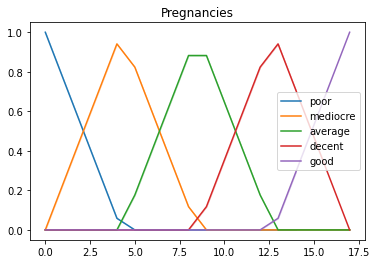

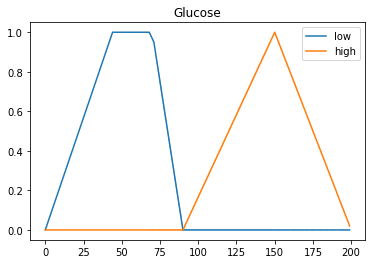

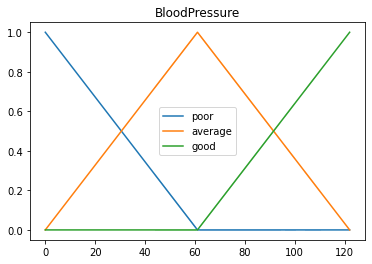

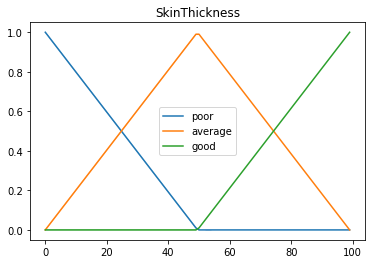

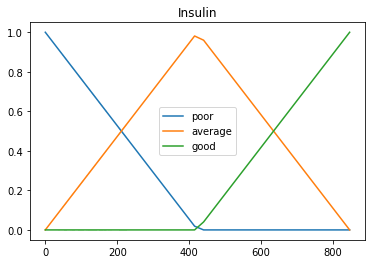

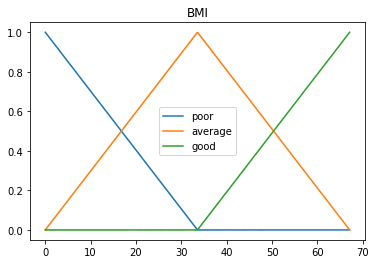

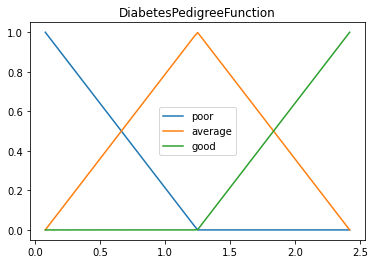

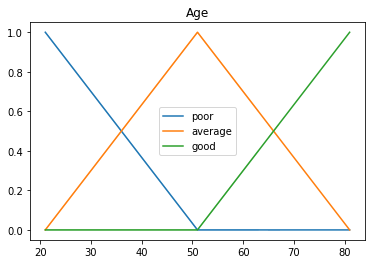

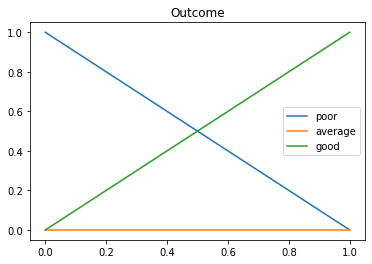

In [ ]:
fuzzifier_diabetes.view()

In [ ]:
forest_df = pd.read_csv("forestcovtype.csv")
forest_df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [ ]:
%%timeit
fuzzifier_forest = Fuzzifier(forest_df)
fuzzifier_forest.fuzzify()


1 loop, best of 5: 1.52 s per loop


In [ ]:
fuzzifier_forest.toDataFrame()